In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16
# plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [7]:
data = [
    np.load("data/PPR_SU2^3_shuffle-False_results_n-3_epochs-20000_targets-1_thetas-20_lbfgs-None_run-0.npz", allow_pickle=True),
    np.load("data/PPR_SU2^4_shuffle-False_results_n-4_epochs-20000_targets-1_thetas-20_lbfgs-None_run-1.npz", allow_pickle=True),
    np.load("data/PPR_SU2^4_shuffle-True_results_n-4_epochs-20000_targets-1_thetas-20_lbfgs-None_run-2.npz", allow_pickle=True),
    np.load("data/PPR_SU2^4_shuffle-True_results_n-4_epochs-20000_targets-1_thetas-20_lbfgs-None_run-3.npz", allow_pickle=True),
    np.load("data/PPR_SU2^4_heuristic_ordering-0_results_n-4_epochs-2000_targets-1_thetas-20_lbfgs-None_run-0.npz", allow_pickle=True),
    np.load("data/PPR_SU2^4_heuristic_ordering--1_results_n-4_epochs-20000_targets-1_thetas-20_lbfgs-None_run-1.npz", allow_pickle=True),
]


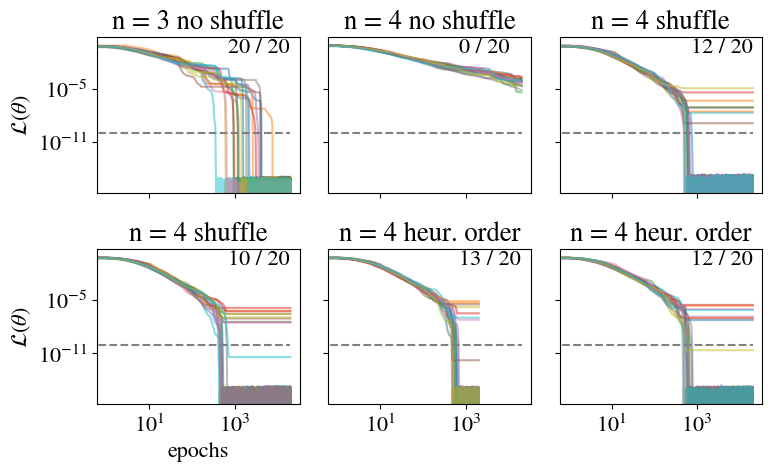

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 5), sharey="row", sharex=True)
thresh = 1e-10
meta_data = [
    ("no shuffle", 3, 0),
    ("no shuffle", 4, 1),
    ("shuffle", 4, 2),
    ("shuffle", 4, 3),
    ("heur. order", 4, 0),
    ("heur. order", 4, 1),
]

successs = []
for idx, meta in enumerate(meta_data):
    shuffle, n, run_id = meta

    ax = axs[idx//3,idx%3]
    en = data[idx]["energy"]
    n_epochs = en.shape[-1]

    success = 0
    for i,e in enumerate(en.reshape((-1, n_epochs))):
        success += int(np.min(e) < thresh)
        ax.plot(e, label=f"seed {i}", alpha=0.5)

    ax.text(0.7 * 1e5/100, 0.1, f"{success} / {en.shape[0]*en.shape[1]}")
    successs.append(success)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.hlines([thresh], 0, 20_000-1, linestyles="--", color="gray") # len(e_) -1
    ax.set_title(f"n = {n} {shuffle}")

axs[0,0].set_ylabel("$\\mathcal{{L}}(\\theta)$")
axs[1,0].set_ylabel("$\\mathcal{{L}}(\\theta)$")
axs[1,0].set_xlabel("epochs")

plt.tight_layout()
plt.savefig("PPR_full_algebra.pdf", bbox_inches = 'tight')